<a href="https://colab.research.google.com/github/kjyothiswaroop/SHALA2020/blob/master/KJS_ML_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.datasets import california_housing
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [2]:
housing_data = california_housing.fetch_california_housing()
housing_data

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [4]:
df = df[df.Target < 5]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19648 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      19648 non-null  float64
 1   HouseAge    19648 non-null  float64
 2   AveRooms    19648 non-null  float64
 3   AveBedrms   19648 non-null  float64
 4   Population  19648 non-null  float64
 5   AveOccup    19648 non-null  float64
 6   Latitude    19648 non-null  float64
 7   Longitude   19648 non-null  float64
 8   Target      19648 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [5]:
X = df.MedInc.to_numpy()
y = df.Target.to_numpy()
type(y)

numpy.ndarray

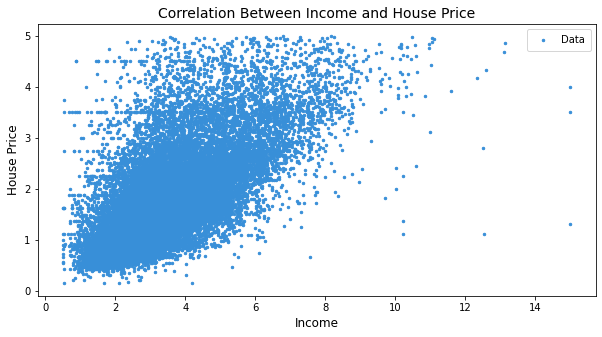

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.00001,epochs=100,batch_size = 1):
    m = 0.1
    b = 0.1
    mse=[]
    N=len(X)
    for _ in range(1,epochs):
      for i in range(N):
        f = y[i]-(m*X[i]+b)
        m = m - lr*(-2*f)*X[i]
        b = b - lr*(-2*f)
      mse.append(mean_squared_error( y , (m*X+b)))
    return m,b,mse 

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

MSE: 0.549184451568008


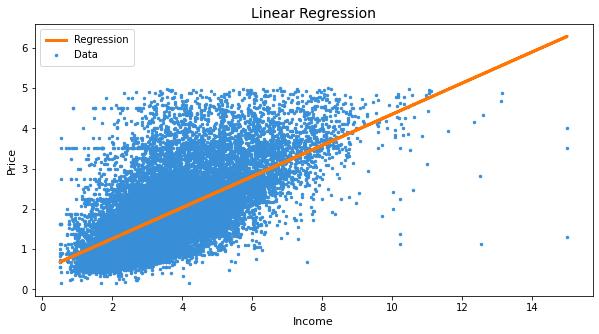

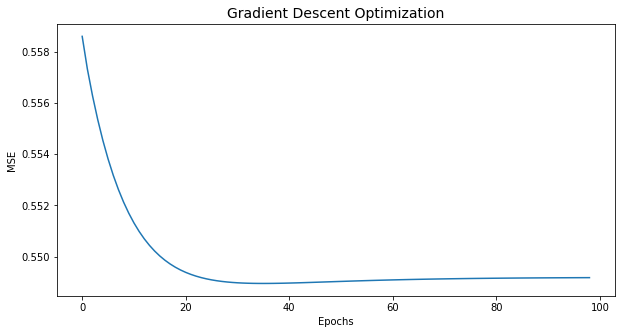

In [16]:
X = df.MedInc.to_numpy()
y = df.Target.to_numpy()
m, b, mse = SGD(X, y, lr=0.00001, epochs=100,batch_size=1)
y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend( loc=0, fontsize=10, borderpad=.6)
plt.show()



plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()